In [49]:
import numpy as np
import cv2
import PIL.Image as Image

import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub

import keras
from keras import layers
from keras.models import Sequential
from keras.applications.mobilenet_v2 import MobileNetV2

In [50]:
conv_base = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

In [51]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [52]:
model = Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [82]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     8,028,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,344,011 (100.49 MB)

 Trainable params: 8,028,675 (30.63 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 16,057,352 (61.25 MB)

In [81]:
conv_base.trainable = False

In [55]:
import pathlib
data_dir = pathlib.Path('./garbage-dataset');

In [56]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('garbage-dataset/paper/paper_926.jpg'),
 PosixPath('garbage-dataset/paper/paper_2718.jpg'),
 PosixPath('garbage-dataset/paper/paper_1205.jpg'),
 PosixPath('garbage-dataset/paper/paper_1563.jpg'),
 PosixPath('garbage-dataset/paper/paper_2042.jpg')]

In [57]:
image_cnt = len(list(data_dir.glob('*/*.jpg')))
print(image_cnt)

4670


In [58]:
paper = list(data_dir.glob('paper/*'))
paper[:5]

[PosixPath('garbage-dataset/paper/paper_926.jpg'),
 PosixPath('garbage-dataset/paper/paper_2718.jpg'),
 PosixPath('garbage-dataset/paper/paper_1205.jpg'),
 PosixPath('garbage-dataset/paper/paper_1563.jpg'),
 PosixPath('garbage-dataset/paper/paper_2042.jpg')]

In [59]:
garbage_images = {
    'paper': [img for img in data_dir.glob('paper/*') if img.name.startswith('.') is False],
    'metal': [img for img in data_dir.glob('metal/*') if img.name.startswith('.') is False],
    'plastic': [img for img in data_dir.glob('plastic/*') if img.name.startswith('.') is False]
}

In [60]:
garbage_labels = {
    'paper': 0,
    'metal': 1,
    'plastic': 2
}

In [61]:
garbage_images['metal'][:5]

[PosixPath('garbage-dataset/metal/metal_2150.jpg'),
 PosixPath('garbage-dataset/metal/metal_2622.jpg'),
 PosixPath('garbage-dataset/metal/metal_2144.jpg'),
 PosixPath('garbage-dataset/metal/metal_358.jpg'),
 PosixPath('garbage-dataset/metal/metal_1465.jpg')]

In [62]:
img = cv2.imread(str(garbage_images['paper'][0]))

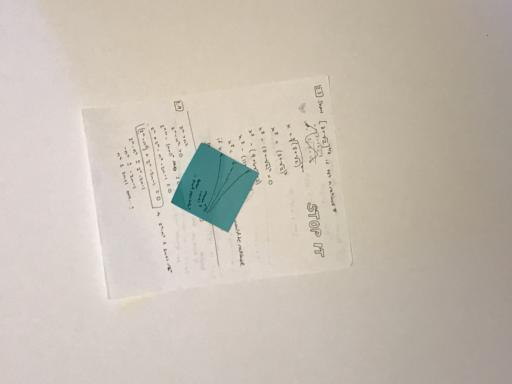

In [63]:
Image.open(str(garbage_images['paper'][0]))

In [64]:
print(img.shape)

(384, 512, 3)


In [65]:
cv2.resize(img, (224, 224)).shape

(224, 224, 3)

In [66]:
x, y = [], []

for garbage_name, images in garbage_images.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (224, 224))
    x.append(resized_img)
    y.append(garbage_labels[garbage_name])

In [67]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [68]:
x = np.array(x)
y = np.array(y)

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [70]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [71]:
x[0].shape

(224, 224, 3)

In [72]:
IMAGE_SHAPE = (224, 224)
IMAGE_SHAPE+(3, )

(224, 224, 3)

In [73]:
x0_resized = cv2.resize(x[0], IMAGE_SHAPE)


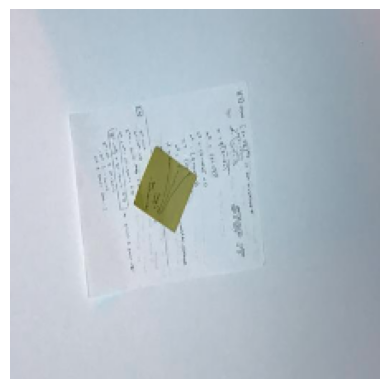

In [74]:
plt.axis('off')
plt.imshow(x[0])

In [75]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [171]:
model.fit(x_train_scaled, y_train, epochs=10)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 161ms/step - acc: 0.9926 - loss: 0.0221
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 167ms/step - acc: 0.9977 - loss: 0.0095
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 173ms/step - acc: 1.0000 - loss: 4.8320e-04
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 166ms/step - acc: 1.0000 - loss: 1.2895e-04
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - acc: 1.0000 - loss: 1.1331e-04
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 175ms/step - acc: 1.0000 - loss: 7.0092e-05
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 174ms/step - acc: 1.0000 - loss: 9.2684e-05
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 174ms/step - acc: 1.0000 - loss: 7.5195e-05
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - acc: 1.0000 - loss: 6.0566e-05
Epoch 10/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - acc: 1.0000 - loss: 5.1721e-05


In [172]:
model.evaluate(x_test_scaled, y_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - acc: 0.9500 - loss: 0.2704


[0.270861953496933, 0.9521776437759399]

In [173]:
test_loss, test_acc = model.evaluate(x_test_scaled, y_test)
print("✅ Test Accuracy:", test_acc)

37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - acc: 0.9500 - loss: 0.2704
✅ Test Accuracy: 0.9521776437759399


37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step


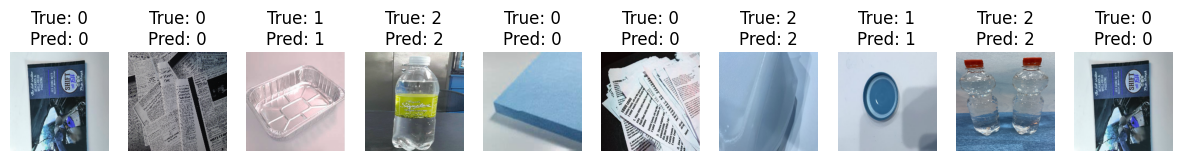

In [174]:
y_pred_probs = model.predict(x_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

def show_predictions(images, labels, preds, n=5):
    plt.figure(figsize=(15, 3))
    for i in range(n):
        idx = np.random.randint(0, len(images))  # pick random test image
        plt.subplot(1, n, i+1)
        plt.imshow(images[idx])
        plt.axis("off")
        plt.title(f"True: {labels[idx]}\nPred: {preds[idx]}")

show_predictions(x_test, y_test, y_pred, n=10)

In [203]:
image_to_check = pathlib.Path('/Users/ditya/Downloads/.jpg');
image_to_check

PosixPath('/Users/ditya/Downloads/plastic.jpg')

In [204]:
img = cv2.imread(str(image_to_check))

In [205]:
print(img.shape)

(1280, 960, 3)


In [206]:
cv2.resize(img, (224, 224)).shape

(224, 224, 3)

In [207]:
img = img / 255

In [208]:
img_batch = np.expand_dims(img, axis=0)

In [209]:
img = cv2.imread(str(image_to_check))
img = cv2.resize(img, (224, 224))
img = img / 255.0

# add batch dimension
img_batch = np.expand_dims(img, axis=0)   # shape becomes (1,224,224,3)

# predict
y_pred_probs = model.predict(img_batch)
y_pred = np.argmax(y_pred_probs, axis=1)[0]

print("Predicted class index:", y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class index: 2
